### Load these variables before plotting

In [1]:
import sys, numpy as np
sys.path.append('../')
import parse
reload(parse)
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [114]:
name = '../saved_states/large_set_test/results-'
norm = 'True'
base = '0.1'
paths = [name+str(i)+'-'+base+'baseNorm'+norm+'.txt' for i in range(1, 101)]

In [115]:
singles = ['all-silh', 'euler', 'all-euler', 'silh-euler']
doubles = ['indiv_silh', 'indiv-euler', 'contour', 'global-kde']

In [116]:
resArr = np.array([parse.parse(f) for f in paths])

In [117]:
bighash = {}
for characteristic in singles:
    bighash[characteristic] = parse.prepare1d(resArr, characteristic)

In [118]:
for characteristic in doubles:
    for dim in [0,1,2]:
        bighash[characteristic+'-dim-'+str(dim)] = parse.prepare2d(resArr, characteristic, dim)

In [119]:
def safelog10(B, noise=1e-5):
    B[B == 0] += noise
    return np.log10(B)

import rpy2.robjects as robjects
from rpy2.robjects.numpy2ri import numpy2ri
import numpy as np

def rds_to_np(Rfile):
    ''' Convert .RData to be able to load 
        the array into Python.

        Rfile := (str) location of file to 
        translate to Python.
    ''' 
    raw = robjects.r['readRDS'](Rfile)
    return raw

---

### Saving the p-values to a readable text file

In [8]:
all_test_dict = {}

In [9]:
all_test_keys = ['euler', 'all-euler', 'indiv-euler-dim-0', 'indiv-euler-dim-1', 'indiv-euler-dim-2', 'silh-euler', 'all-silh', 'indiv_silh-dim-0', 'indiv_silh-dim-1', 'indiv_silh-dim-2', 'contour-dim-0', 'contour-dim-1', 'contour-dim-2', 'global-kde-dim-0', 'global-kde-dim-1', 'global-kde-dim-2']

In [10]:
for key in all_test_keys:
    all_test_dict[key] = np.array([np.exp(i) for i in bighash[key]])
# [list(np.exp(i)) for i in bighash[key]]

In [33]:
if norm == 'False':
    data = np.array(rds_to_np('/Users/mikewu/Desktop/Research/persist-homology/correlation/output/voronoi_proba_norm(0).rds'))
else:
    data = np.array(rds_to_np('/Users/mikewu/Desktop/Research/persist-homology/correlation/output/voronoi_proba_norm(1).rds'))

data = np.exp(data)
fun = lambda x : np.percentile(x, 50, axis=0)
bighash2 = [data]

In [12]:
all_test_dict['corr'] = np.array([i for i in bighash2[0]]).T

In [13]:
all_test_dict['euler'].shape, all_test_dict['corr'].shape

((9, 100), (9, 100))

In [14]:
all_keys = all_test_dict.keys()
all_vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in range(9):
    with file('/Users/mikewu/Desktop/pvals-standardize-%s-percfil-%.2f.txt' % (norm, all_vals[i]), 'w') as outfile:
        for key in all_test_dict.keys():
            outfile.write('%-20s'% key)
        outfile.write('\n\n')
        
        for j in range(100):
            for key in all_test_dict.keys():
                outfile.write('%-20.2f'% all_test_dict[key][i, j])
            outfile.write('\n')

---

In [25]:
i = bighash['contour-dim-0'][-1]
np.percentile(np.log10(np.exp(i)), 50)

-2.0000000060852945

#### Euler Characteristic Plot

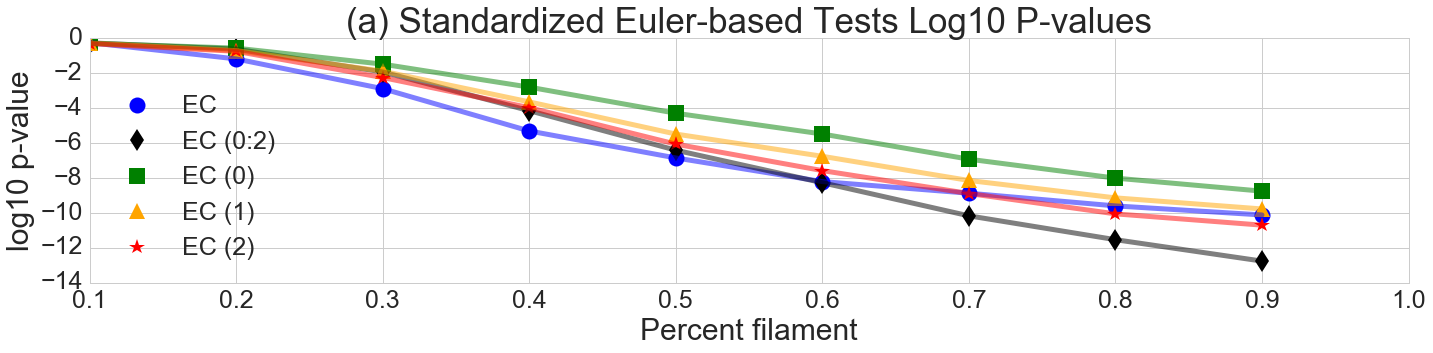

In [120]:
xvalues = np.arange(0.1, 1.0, 0.1)
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 
plt.figure(figsize=(20,5))
if norm == 'True':
    plt.title('(a) Standardized Euler-based Tests Log10 P-values', fontsize=35)
else:
    plt.title('(a) Euler-based Tests Log10 P-values', fontsize=35)
plt.ylabel('log10 p-value', fontsize=30)
plt.xlabel('Percent filament', fontsize=30)

allkeys = ['euler', 'all-euler', 'indiv-euler-dim-0', 'indiv-euler-dim-1', 'indiv-euler-dim-2']
allticks = ['EC', 'EC (0:2)', 'EC (0)', 'EC (1)', 'EC (2)']
allcolors = ['b', 'k', 'g', 'orange', 'r']
allshapes = ['o', 'd', 's', '^', '*']
allgraphs = []

for k, c, s, t in zip(allkeys, allcolors, allshapes, allticks):
    graph, = plt.plot(xvalues, [np.percentile(np.log10(np.exp(i)), 50) for i in bighash[k]], s, color=c, markersize=16, label=t)
    allgraphs.append(graph)
plt.legend(allticks, fontsize=25, loc='lower left')

for k, c, s in zip(allkeys, allcolors, allshapes):
    _, plt.plot(xvalues, [np.percentile(np.log10(np.exp(i)), 50) for i in bighash[k]], color=c, markersize=30, alpha=0.5, linewidth=5.0)

plt.tick_params(axis='both', which='major', labelsize=25)
plt.tight_layout()
plt.savefig("/Users/mikewu/Desktop/newfigs/euler_lineplot_log10_norm_%s.pdf" % (norm), bbox_inches='tight')
plt.savefig("/Users/mikewu/Desktop/newfigs/euler_lineplot_log10_norm_%s.png" % (norm), bbox_inches='tight')
plt.show()

----

#### Silhouette Based Test Plot

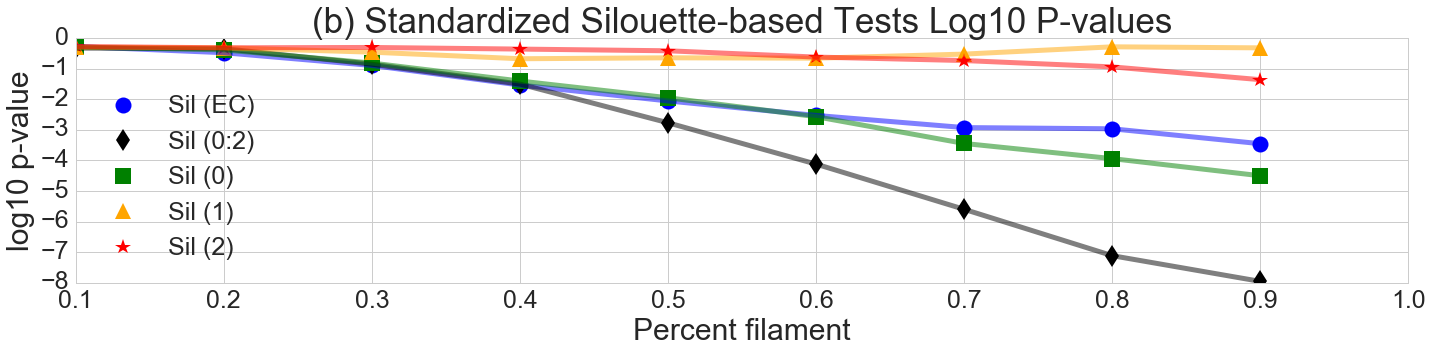

In [121]:
xvalues = np.arange(0.1, 1.0, 0.1)
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 
plt.figure(figsize=(20,5))
if norm == 'True':
    plt.title('(b) Standardized Silouette-based Tests Log10 P-values', fontsize=35)
else:
    plt.title('(b) Silouette-based Tests Log10 P-values', fontsize=35)
plt.ylabel('log10 p-value', fontsize=30)
plt.xlabel('Percent filament', fontsize=30)

allkeys = ['silh-euler', 'all-silh', 'indiv_silh-dim-0', 'indiv_silh-dim-1', 'indiv_silh-dim-2']
allticks = ['Sil (EC)', 'Sil (0:2)', 'Sil (0)', 'Sil (1)', 'Sil (2)']
allcolors = ['b', 'k', 'g', 'orange', 'r']
allshapes = ['o', 'd', 's', '^', '*']
allgraphs = []

for k, c, s, t in zip(allkeys, allcolors, allshapes, allticks):
    graph, = plt.plot(xvalues, [np.percentile(np.log10(np.exp(i)), 50) for i in bighash[k]], s, color=c, markersize=16, label=t)
    allgraphs.append(graph)
plt.legend(allticks, fontsize=25, loc='best')

for k, c, s in zip(allkeys, allcolors, allshapes):
    _, plt.plot(xvalues, [np.percentile(np.log10(np.exp(i)), 50) for i in bighash[k]], color=c, markersize=30, alpha=0.5, linewidth=5.0)

plt.tick_params(axis='both', which='major', labelsize=25)    
plt.tight_layout()
plt.savefig("/Users/mikewu/Desktop/newfigs/silh_lineplot_log10_norm_%s.pdf" % (norm), bbox_inches='tight')
plt.savefig("/Users/mikewu/Desktop/newfigs/silh_lineplot_log10_norm_%s.png" % (norm), bbox_inches='tight')
plt.show()

---

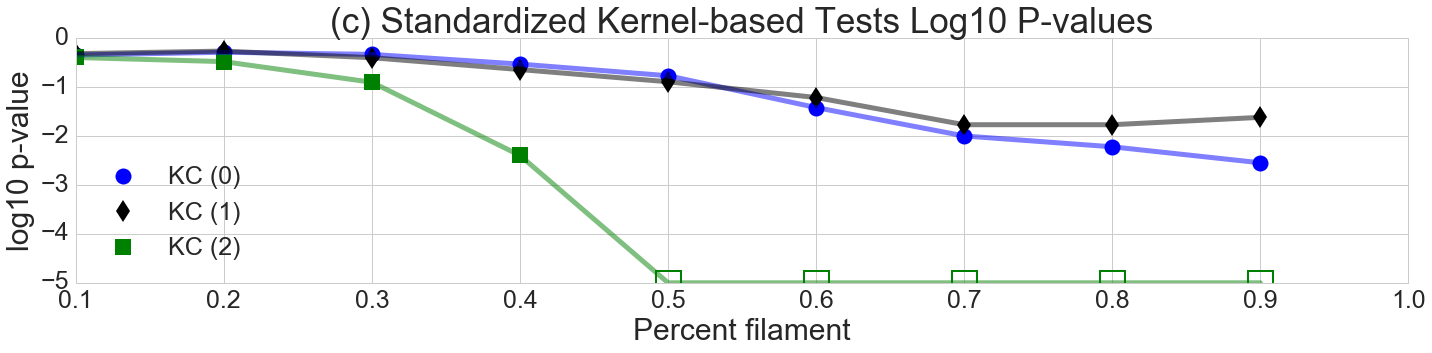

In [122]:
xvalues = np.arange(0.1, 1.0, 0.1)
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 
plt.figure(figsize=(20,5))
if norm == 'True':
    plt.title('(c) Standardized Kernel-based Tests Log10 P-values', fontsize=35)
else:
    plt.title('(c) Kernel-based Tests Log10 P-values', fontsize=35)
plt.ylabel('log10 p-value', fontsize=30)
plt.xlabel('Percent filament', fontsize=30)

allkeys = ['contour-dim-0', 'contour-dim-1', 'contour-dim-2']
allticks = ['KC (0)', 'KC (1)', 'KC (2)']
allcolors = ['b', 'k', 'g', 'orange', 'r', 'm']
allshapes = ['o', 'd', 's', '^', '*', 'v']
allgraphs = []

for k, c, s, t in zip(allkeys, allcolors, allshapes, allticks):
    tmpplotme = np.array([np.percentile(safelog10(np.exp(i)), 50) for i in bighash[k]])
    tmp2plotme = np.array([np.percentile(np.log(np.exp(i)), 50) for i in bighash[k]])
    if k == 'contour-dim-0' and norm == 'False':
        tmpplotme[-1] = -np.inf
    tmpboolme = np.isinf(tmp2plotme)
    graph, = plt.plot(xvalues[~tmpboolme], tmpplotme[~tmpboolme], s, color=c, markersize=16, label=t)

plt.legend(allticks, fontsize=25, loc='best')

for k, c, s, t in zip(allkeys, allcolors, allshapes, allticks):
    tmpplotme = np.array([np.percentile(safelog10(np.exp(i)), 50) for i in bighash[k]])
    tmp2plotme = np.array([np.percentile(np.log(np.exp(i)), 50) for i in bighash[k]])
    if k == 'contour-dim-0' and norm == 'False':
        tmpplotme[-1] = -np.inf
    tmpboolme = np.isinf(tmp2plotme)
    graph, = plt.plot(xvalues[tmpboolme], tmpplotme[tmpboolme], s, color=c, markersize=25, 
                      markeredgewidth=2, markeredgecolor=c, markerfacecolor='None')

for k, c, s in zip(allkeys, allcolors, allshapes):
    tmp = [np.percentile(safelog10(np.exp(i)), 50) for i in bighash[k]]
    if k == 'contour-dim-0' and norm == 'False':
        tmp[-1] = -np.inf
    _, plt.plot(xvalues, tmp, color=c, markersize=30, alpha=0.5, linewidth=5.0)

plt.tick_params(axis='both', which='major', labelsize=25)    
plt.tight_layout()
plt.savefig("/Users/mikewu/Desktop/newfigs/smooth_lineplot_log10_norm_%s.pdf" % (norm), bbox_inches='tight')
plt.savefig("/Users/mikewu/Desktop/newfigs/smooth_lineplot_log10_norm_%s.png" % (norm), bbox_inches='tight')
plt.show()

#### New Contour-based Tests

In [123]:
pi_data = np.load('/Users/mikewu/Desktop/Research/persist-homology/intensity/output/proba/nonorm/ans-voronoi-nodim.npy')
wkc_data = np.load('/Users/mikewu/Desktop/Research/persist-homology/intensity/output/proba/nonorm/ans-voronoi-bydim.npy')

In [124]:
wkc_data.shape, pi_data.shape
wkc_0 = wkc_data[:, 0, :]
wkc_1 = wkc_data[:, 1, :]
wkc_2 = wkc_data[:, 2, :]
pi_all = pi_data

plot_fun = lambda x : np.percentile(np.log10(1 - np.exp(x)), 50, axis=0)
safe_plot_fun = lambda x : np.percentile(safelog10(1 - np.exp(x)), 50, axis=0)
safe_plot_fun_2  = lambda x : np.percentile(safelog10(1 - np.exp(x), noise=1e-25), 50, axis=0)

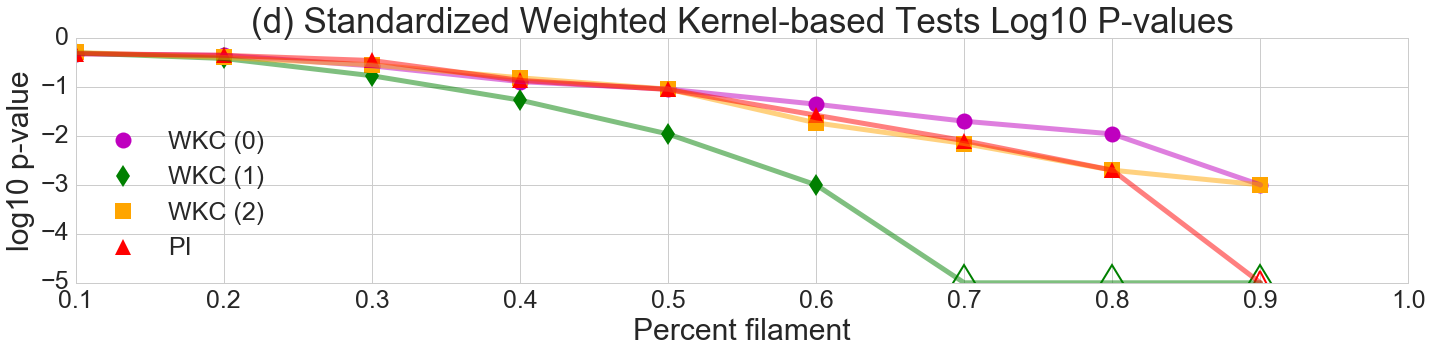

In [125]:
xvalues = np.arange(0.1, 1.0, 0.1)
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 
plt.figure(figsize=(20,5))
if norm == 'True':
    plt.title('(d) Standardized Weighted Kernel-based Tests Log10 P-values', fontsize=35)
else:
    plt.title('(d) Weighted Kernel-based Tests Log10 P-values', fontsize=35)
plt.ylabel('log10 p-value', fontsize=30)
plt.xlabel('Percent filament', fontsize=30)

alldata   = [wkc_0, wkc_1, wkc_2, pi_all]
allticks  = ['WKC (0)', 'WKC (1)', 'WKC (2)', 'PI']
allcolors = ['m', 'g', 'orange', 'r']
allshapes = ['o', 'd', 's', '^']
allgraphs = []

for d, c, s, t in zip(alldata, allcolors, allshapes, allticks):
    tmpplotme = safe_plot_fun(d)
    tmp2plotme = plot_fun(d)
    tmpboolme = np.isinf(tmp2plotme)
    graph, = plt.plot(xvalues[~tmpboolme], tmpplotme[~tmpboolme], s, color=c, markersize=16, label=t)

plt.legend(allticks, fontsize=25, loc='best')

for d, c, s, t in zip(alldata, allcolors, allshapes, allticks):
    tmpplotme = safe_plot_fun(d)
    tmp2plotme = plot_fun(d)
    tmpboolme = np.isinf(tmp2plotme)
    graph, = plt.plot(xvalues[tmpboolme], tmpplotme[tmpboolme], s, color=c, markersize=25, 
                      markeredgewidth=2, markeredgecolor=c, markerfacecolor='None')

for d, c, s in zip(alldata, allcolors, allshapes):
    _, plt.plot(xvalues, safe_plot_fun(d), color=c, markersize=30, alpha=0.5, linewidth=5.0)
    
plt.tick_params(axis='both', which='major', labelsize=25)    
plt.tight_layout()
plt.savefig("/Users/mikewu/Desktop/newfigs/weight_lineplot_log10_norm_%s.pdf" % (norm), bbox_inches='tight')
plt.savefig("/Users/mikewu/Desktop/newfigs/weight_lineplot_log10_norm_%s.png" % (norm), bbox_inches='tight')
plt.show()

---

#### Correlation function test

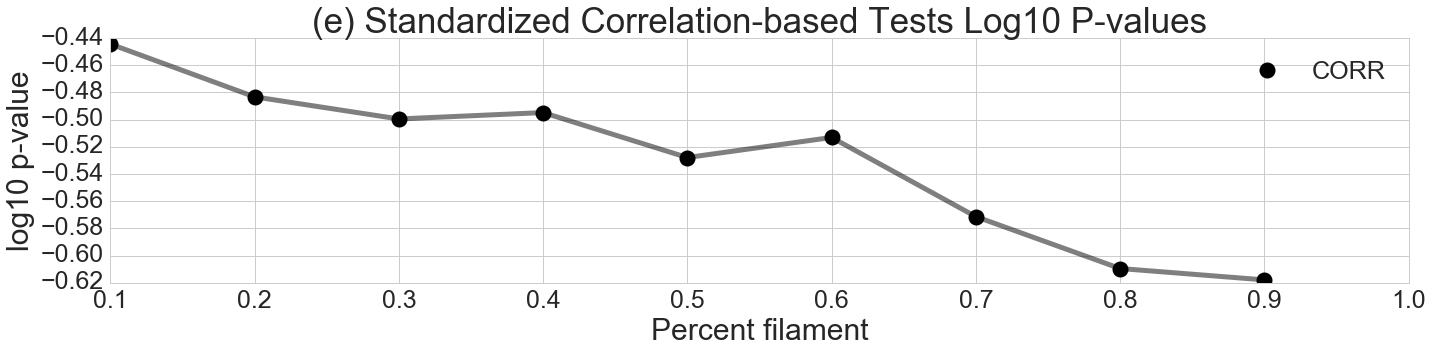

In [126]:
xvalues = np.arange(0.1, 1.0, 0.1)
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 
plt.figure(figsize=(20,5))
if norm == 'True':
    plt.title('(e) Standardized Correlation-based Tests Log10 P-values', fontsize=35)
else:
    plt.title('(e) Correlation-based Tests Log10 P-values', fontsize=35)
plt.ylabel('log10 p-value', fontsize=30)
plt.xlabel('Percent filament', fontsize=30)

allticks = ['CORR']
allcolors = ['k']
allshapes = ['o']
allgraphs = []

if norm == 'False':
    data = np.array(rds_to_np('/Users/mikewu/Desktop/Research/persist-homology/correlation/output/voronoi_proba_norm(0).rds'))
else:
    data = np.array(rds_to_np('/Users/mikewu/Desktop/Research/persist-homology/correlation/output/voronoi_proba_norm(1).rds'))

    
data = np.log10(np.exp(data))

fun = lambda x : np.percentile(x, 50, axis=0)
bighash2 = [fun(data)]

for k, (c, s, t) in enumerate(zip(allcolors, allshapes, allticks)):
    graph, = plt.plot(xvalues, bighash2[k], s, color=c, markersize=16, label=t)
    allgraphs.append(graph)
plt.legend(allticks, fontsize=25, loc='best')

for k, (c, s) in enumerate(zip(allcolors, allshapes)):
    _, plt.plot(xvalues, bighash2[k], color=c, markersize=30, alpha=0.5, linewidth=5.0)

plt.tick_params(axis='both', which='major', labelsize=25)
plt.tight_layout()
plt.savefig("/Users/mikewu/Desktop/newfigs/corr_lineplot_log10_norm_%s.pdf" % (norm), bbox_inches='tight')
plt.savefig("/Users/mikewu/Desktop/newfigs/corr_lineplot_log10_norm_%s.png" % (norm), bbox_inches='tight')
plt.show()

---

#### Best of Each Test

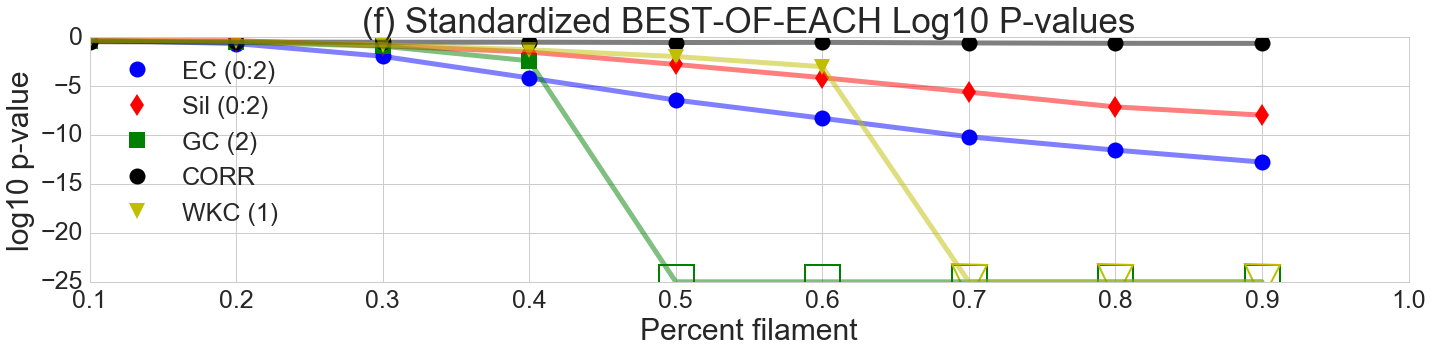

In [128]:
xvalues = np.arange(0.1, 1.0, 0.1)
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 
plt.figure(figsize=(20,5))
if norm == 'True':
    plt.title('(f) Standardized BEST-OF-EACH Log10 P-values', fontsize=35)
else:
    plt.title('(f) BEST-OF-EACH Log10 P-values', fontsize=35)
plt.ylabel('log10 p-value', fontsize=30)
plt.xlabel('Percent filament', fontsize=30)

allkeys = ['all-euler', 'all-silh', 'contour-dim-2']
allticks = ['EC (0:2)', 'Sil (0:2)', 'GC (2)']
allcolors = ['b', 'r', 'g', 'orange']
allshapes = ['o', 'd', 's', '^']

for k, c, s, t in zip(allkeys, allcolors, allshapes, allticks):
    tmpplotme = np.array([np.percentile(safelog10(np.exp(i), noise=1e-25), 50) for i in bighash[k]])
    tmp2plotme = np.array([np.percentile(np.log(np.exp(i)), 50) for i in bighash[k]])
    tmpboolme = np.isinf(tmp2plotme)
    graph, = plt.plot(xvalues[~tmpboolme], tmpplotme[~tmpboolme], s, color=c, markersize=16, label=t)

graph, = plt.plot(xvalues, fun(data), 'o', color='k', markersize=16, label='CORR')
tmpplotme = safe_plot_fun_2(wkc_1)
tmp2plotme = plot_fun(wkc_1)
tmpboolme = np.isinf(tmp2plotme)
graph, = plt.plot(xvalues[~tmpboolme], tmpplotme[~tmpboolme], 'v', color='y', markersize=16, label='WKC (1)')
plt.legend(allticks + ['CORR', 'WKC (1)'], fontsize=25, loc='best')

for k, c, s, t in zip(allkeys, allcolors, allshapes, allticks):
    tmpplotme = np.array([np.percentile(safelog10(np.exp(i), noise=1e-25), 50) for i in bighash[k]])
    tmp2plotme = np.array([np.percentile(np.log(np.exp(i)), 50) for i in bighash[k]])
    tmpboolme = np.isinf(tmp2plotme)
    graph, = plt.plot(xvalues[tmpboolme], tmpplotme[tmpboolme], s, color=c, markersize=35, 
                      markeredgewidth=2, markeredgecolor=c, markerfacecolor='None')

tmpplotme = safe_plot_fun_2(wkc_1)
tmp2plotme = plot_fun(wkc_1)
tmpboolme = np.isinf(tmp2plotme)
graph, = plt.plot(xvalues[tmpboolme], tmpplotme[tmpboolme], 'v', color='y', markersize=35,
                  markeredgewidth=2, markeredgecolor='y', markerfacecolor='None')
    
for k, c, s in zip(allkeys, allcolors, allshapes):
    _, plt.plot(xvalues, [np.percentile(safelog10(np.exp(i), noise=1e-25), 50) for i in bighash[k]], color=c, markersize=30, alpha=0.5, linewidth=5.0)
_, plt.plot(xvalues, fun(data), color='k', markersize=30, alpha=0.5, linewidth=5.0)
_, plt.plot(xvalues, safe_plot_fun_2(wkc_1), color='y', markersize=30, alpha=0.5, linewidth=5.0)

plt.tick_params(axis='both', which='major', labelsize=25)
plt.tight_layout()
plt.savefig("/Users/mikewu/Desktop/newfigs/cross_lineplot_log10_norm_%s.pdf" % (norm), bbox_inches='tight')
plt.savefig("/Users/mikewu/Desktop/newfigs/cross_lineplot_log10_norm_%s.png" % (norm), bbox_inches='tight')
plt.show()